In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
!unzip archive.zip


Archive:  archive.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [19]:
import zipfile
import io
import pandas as pd

# Specify the uploaded zip file name
zip_file_name = 'archive.zip'

# Read a specific file from the zip without extracting
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Assuming 'example.csv' is the file you want to read
    csv_file_name = 'ratings.csv'

    # Read the CSV file into a DataFrame
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file)

# Display the first few rows of the DataFrame
print(df.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [59]:
df.head()

,userId,movieId,rating,user_idx,movie_idx
0,1,1,4.0,0,0
1,1,3,4.0,0,1
2,1,6,4.0,0,2
3,1,47,5.0,0,3
4,1,50,5.0,0,4


In [14]:
# Extract unique user and item counts
num_users = df['userId'].nunique()
num_items = df['movieId'].nunique()

In [41]:
df = df.drop('timestamp', axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [43]:
print("Unique users:", train_data['userId'].unique())
print("Unique movies:", train_data['movieId'].unique())


Unique users: [ 42 219 474 411 561 608 606 346 109 387  19 514 610 525 182 298 330 600
  68 249 476 372 274 318  93 393  36  21 292 430 455 414 398 603 256 105
 467 304 580 288 560  67 527  57 224 434  18 416 339 125 323 221 284 596
 448 555 523 143 599 352 587 317 165 385 275 250 285 187 583 305 312 464
 231  48 480 266 482 296   4 489  62  79 509 438 539 313  89 211 577 559
 290 294  10 265  51 234 594 232  95 367  20 368 378 365 124 384 260  16
 199 236 397 534 556 158 504 160 591 238 564 462 226 202 233  73 477 437
 552 597  41 495 380 137 382 362  66 227 287  17 156 178 483 100 432 128
  91 135 279 115  58 554 351  50 222 520 529 446 244 307 573 262 291  84
 605 140 198 445 103 469 151 104 371  47 259 327 111  64 132 607 410 381
  98 531 168 379  78 153 213  59 110 548 412 254 517 210  28 190 354 570
 542 524 217 146 391 282 159  74 337 121 562 419 241 541 157 566  30  76
 579 200 490 342 308 355 247 588 334 203 526  80 181 177 452 276 141 590
 326   8 404 357 230  82 246 225 359 

In [51]:
df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [44]:
train_data['userId'] = train_data['userId'] - 1
train_data['movieId'] = train_data['movieId'] - 1


In [45]:
num_items

9724

In [46]:
#### Split the data into training and testing sets

In [47]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [53]:
def collaborative_filtering_model(num_users, num_items, embedding_size=50, reg=0.01):
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1, embeddings_regularizer=l2(reg))(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, input_length=1, embeddings_regularizer=l2(reg))(item_input)

    user_flat = Flatten()(user_embedding)
    item_flat = Flatten()(item_embedding)

    concatenated = Concatenate()([user_flat, item_flat])

    dense_1 = Dense(64, activation='relu')(concatenated)
    dropout_1 = Dropout(0.5)(dense_1)

    dense_2 = Dense(32, activation='relu')(dropout_1)
    dropout_2 = Dropout(0.5)(dense_2)

    output = Dense(1, activation='linear')(dropout_2)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
    return model

In [23]:
num_users

610

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.regularizers import l2



# Assuming you have unique user and movie IDs, you can map them to integer indices
user_mapping = {user_id: idx for idx, user_id in enumerate(df['userId'].unique())}
movie_mapping = {movie_id: idx for idx, movie_id in enumerate(df['movieId'].unique())}

df['user_idx'] = df['userId'].map(user_mapping)
df['movie_idx'] = df['movieId'].map(movie_mapping)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define the model
num_users = len(df['userId'].unique())
num_items = len(df['movieId'].unique())
embedding_size = 50

model = collaborative_filtering_model(num_users, num_items, embedding_size=embedding_size)

# Train the model
model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate([test_data['user_idx'], test_data['movie_idx']], test_data['rating'])
print(f"Test Loss: {test_loss}")


Epoch 1/10
1009/1009 [==============================] - 10s 9ms/step - loss: 2.5635 - val_loss: 1.0911
Epoch 2/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.6108 - val_loss: 1.0601
Epoch 3/10
1009/1009 [==============================] - 7s 7ms/step - loss: 1.3846 - val_loss: 0.9873
Epoch 4/10
1009/1009 [==============================] - 9s 8ms/step - loss: 1.2232 - val_loss: 0.9894
Epoch 5/10
1009/1009 [==============================] - 9s 9ms/step - loss: 1.1068 - val_loss: 0.9695
Epoch 6/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.0211 - val_loss: 0.9481
Epoch 7/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9750 - val_loss: 0.9436
Epoch 8/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9398 - val_loss: 0.9475
Epoch 9/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9288 - val_loss: 0.9586
Epoch 10/10
631/631 [==============================] - 1s 2ms/step - loss: 0.9503

Epoch 1/10
1009/1009 [==============================] - 22s 19ms/step - loss: 2.3685 - val_loss: 1.1301
Epoch 2/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.5258 - val_loss: 1.0396
Epoch 3/10
1009/1009 [==============================] - 9s 9ms/step - loss: 1.3327 - val_loss: 1.0056
Epoch 4/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.2117 - val_loss: 0.9688
Epoch 5/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.0995 - val_loss: 0.9629
Epoch 6/10
1009/1009 [==============================] - 9s 8ms/step - loss: 1.0219 - val_loss: 0.9510
Epoch 7/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9720 - val_loss: 0.9472
Epoch 8/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9424 - val_loss: 0.9420
Epoch 9/10
1009/1009 [==============================] - 9s 9ms/step - loss: 0.9249 - val_loss: 0.9557
Epoch 10/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9

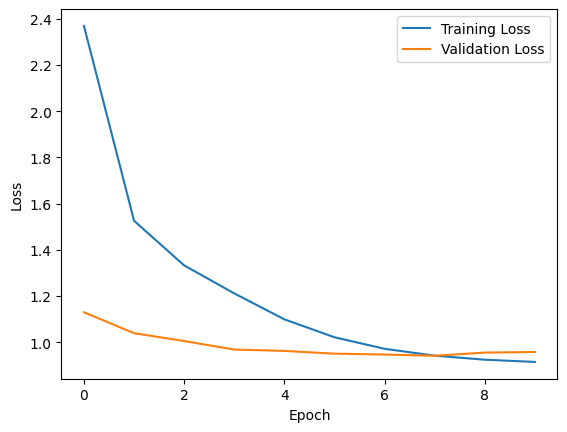

In [58]:
import matplotlib.pyplot as plt

# Assuming you've already created and compiled your model
model = collaborative_filtering_model(num_users, num_items, embedding_size=50)

# Train the model and get the training history
history = model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=10, batch_size=64, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


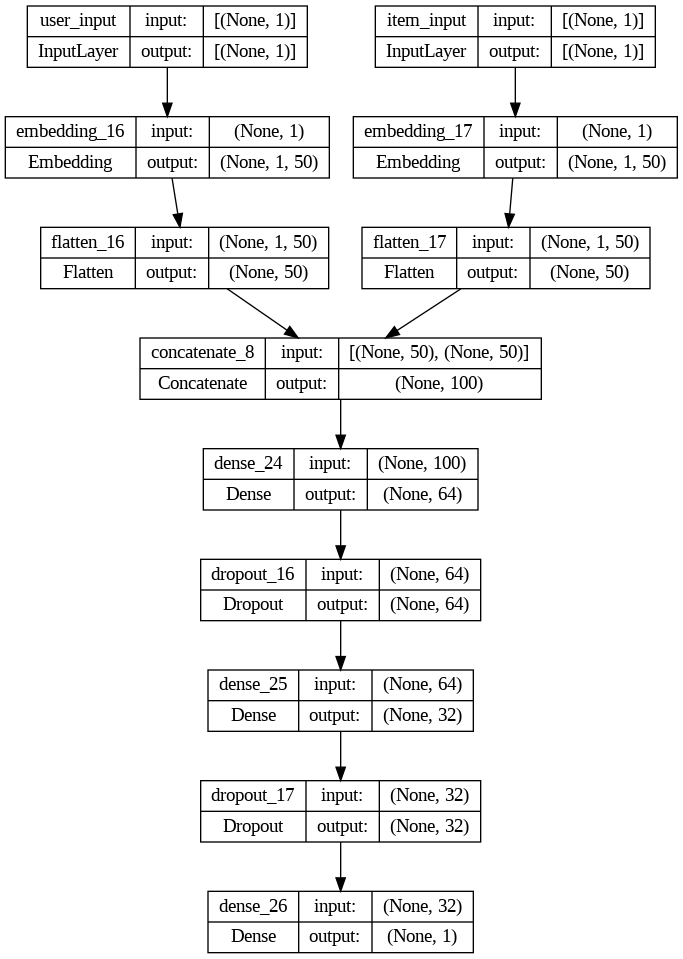

In [57]:
from tensorflow.keras.utils import plot_model

# Assuming you've already created and compiled your model
model = collaborative_filtering_model(num_users, num_items, embedding_size=50)

# Plot the model architecture
plot_model(model, to_file='collaborative_filtering_model.png', show_shapes=True, show_layer_names=True)


#Adding L2 regularzation to user and item

In [60]:
def collaborative_filtering_model_dual_regularizer(num_users, num_items, embedding_size=50, reg=0.01):
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1, embeddings_regularizer=l2(reg))(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, input_length=1, embeddings_regularizer=l2(reg))(item_input)

    user_flat = Flatten()(user_embedding)
    item_flat = Flatten()(item_embedding)

    concatenated = Concatenate()([user_flat, item_flat])

    dense_1 = Dense(64, activation='relu')(concatenated)
    dropout_1 = Dropout(0.5)(dense_1)

    dense_2 = Dense(32, activation='relu')(dropout_1)
    dropout_2 = Dropout(0.5)(dense_2)

    output = Dense(1, activation='linear')(dropout_2)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
    return model


In [63]:
regularazed_model = collaborative_filtering_model_dual_regularizer(num_users, num_items, embedding_size=embedding_size, reg=0.01)


In [64]:
# Train the model
regularazed_model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss = regularazed_model.evaluate([test_data['user_idx'], test_data['movie_idx']], test_data['rating'])
print(f"Test Loss: {test_loss}")


Epoch 1/10
1009/1009 [==============================] - 9s 8ms/step - loss: 2.4899 - val_loss: 1.1229
Epoch 2/10
1009/1009 [==============================] - 9s 9ms/step - loss: 1.6045 - val_loss: 1.0253
Epoch 3/10
1009/1009 [==============================] - 9s 9ms/step - loss: 1.3782 - val_loss: 1.0123
Epoch 4/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.2148 - val_loss: 0.9788
Epoch 5/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.1051 - val_loss: 0.9682
Epoch 6/10
1009/1009 [==============================] - 8s 8ms/step - loss: 1.0304 - val_loss: 0.9595
Epoch 7/10
1009/1009 [==============================] - 7s 7ms/step - loss: 0.9842 - val_loss: 0.9535
Epoch 8/10
1009/1009 [==============================] - 9s 9ms/step - loss: 0.9503 - val_loss: 0.9551
Epoch 9/10
1009/1009 [==============================] - 10s 10ms/step - loss: 0.9300 - val_loss: 0.9570
Epoch 10/10
631/631 [==============================] - 1s 2ms/step - loss: 0.940

Epoch 1/10
1009/1009 [==============================] - 12s 12ms/step - loss: 0.9161 - val_loss: 0.9612
Epoch 2/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9099 - val_loss: 0.9574
Epoch 3/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.9048 - val_loss: 0.9556
Epoch 4/10
1009/1009 [==============================] - 9s 9ms/step - loss: 0.9039 - val_loss: 0.9464
Epoch 5/10
1009/1009 [==============================] - 9s 9ms/step - loss: 0.9038 - val_loss: 0.9540
Epoch 6/10
1009/1009 [==============================] - 9s 8ms/step - loss: 0.9018 - val_loss: 0.9440
Epoch 7/10
1009/1009 [==============================] - 9s 9ms/step - loss: 0.8976 - val_loss: 0.9411
Epoch 8/10
1009/1009 [==============================] - 9s 9ms/step - loss: 0.8972 - val_loss: 0.9437
Epoch 9/10
1009/1009 [==============================] - 8s 7ms/step - loss: 0.8990 - val_loss: 0.9528
Epoch 10/10
1009/1009 [==============================] - 9s 9ms/step - loss: 0.8

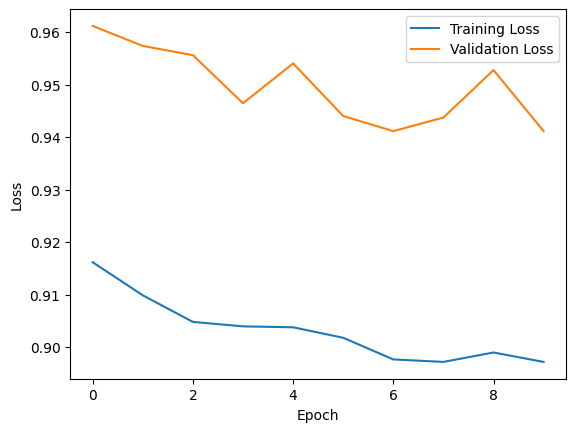

In [65]:
history = regularazed_model.fit([train_data['user_idx'], train_data['movie_idx']], train_data['rating'], epochs=10, batch_size=64, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
